<a href="https://colab.research.google.com/github/antreev-brar/ML-projects/blob/master/regression_model_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs



In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0-rc3


In [4]:
dataset_path = keras.utils.get_file("auto-mpg.data" , "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [5]:
column_names = ['MPG' , 'Cylinders' , 'Displacement' , 'Horsepower' , 'Weight' , 'Acceleration' , 'Model Year' , 'Origin']
raw_dataset = pd.read_csv(dataset_path , names = column_names , na_values = "?" , comment='\t' , sep = " " , skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset['Origin'] = dataset['Origin'].map({ 1 : 'USA' ,2 : 'Europe' , 3 :'Japan'})


In [10]:
dataset = pd.get_dummies(dataset , prefix = '' , prefix_sep = '')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [0]:
train_dataset = dataset.sample(frac = 0.8 , random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

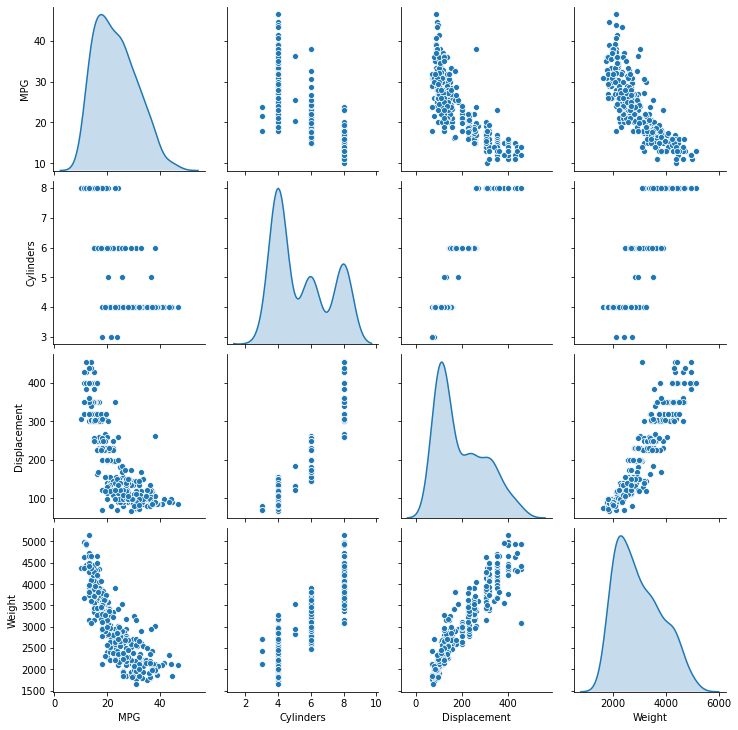

In [12]:
sns.pairplot(train_dataset[["MPG" , "Cylinders" , "Displacement" , "Weight"]] , diag_kind = "kde")

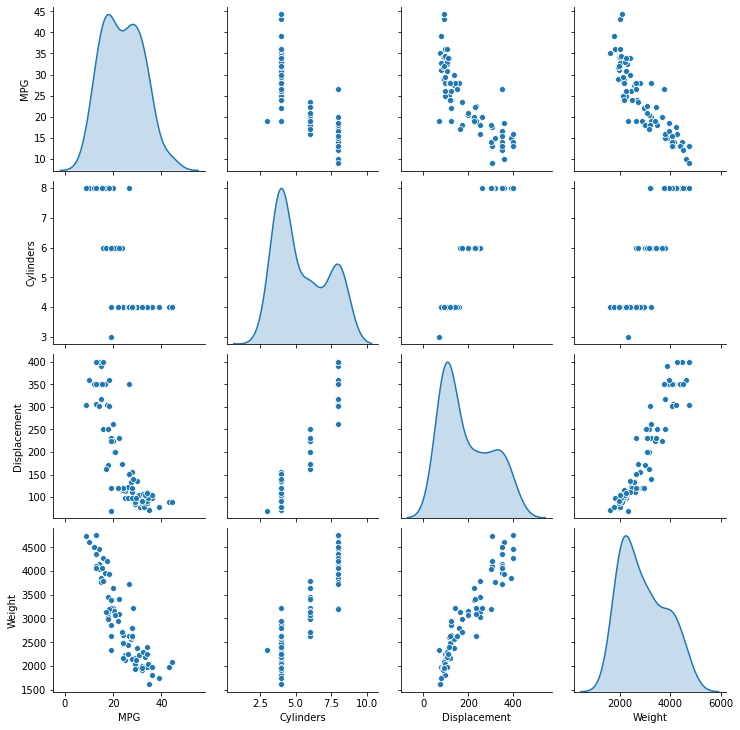

In [13]:
sns.pairplot(test_dataset[["MPG" , "Cylinders" , "Displacement" , "Weight"]] , diag_kind = "kde")

In [14]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
  return ( x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [17]:
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.465148,-0.495225,0.774676
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.465148,-0.495225,0.774676
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-0.465148,2.012852,-1.286751
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-0.465148,2.012852,-1.286751
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,2.143005,-0.495225,-1.286751


In [0]:
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation ='relu' , input_shape = [len(train_dataset.keys())]) , 
        layers.Dense(64, activation ='relu'  ),
        layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = 'mse' ,
                optimizer = optimizer,
                metrics= ['mae', 'mse'])
  return model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [22]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.2329481 ],
       [ 0.02709127],
       [-0.23901495],
       [-0.08795612],
       [-0.03342579],
       [-0.06496604],
       [-0.01797788],
       [-0.20694995],
       [-0.05542293],
       [-0.4461816 ]], dtype=float32)

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [24]:
EPOCHS = 1000

history = model.fit(
    normed_train_data ,  train_labels , 
    epochs = EPOCHS , validation_split = 0.2 , 
    verbose = 0 ,
    callbacks = [tfdocs.modeling.EpochDots()] 
 )


Epoch: 0, loss:594.6665,  mae:23.1815,  mse:595.3023,  val_loss:600.7064,  val_mae:23.2839,  val_mse:600.9551,  
....................................................................................................
Epoch: 100, loss:6.6147,  mae:1.8560,  mse:6.6404,  val_loss:8.1930,  val_mae:2.1628,  val_mse:8.1920,  
....................................................................................................
Epoch: 200, loss:5.3592,  mae:1.6208,  mse:5.4307,  val_loss:8.0409,  val_mae:2.1661,  val_mse:8.0274,  
....................................................................................................
Epoch: 300, loss:4.8118,  mae:1.5194,  mse:4.8495,  val_loss:8.4979,  val_mae:2.2388,  val_mse:8.4778,  
....................................................................................................
Epoch: 400, loss:4.1316,  mae:1.3672,  mse:4.1170,  val_loss:8.7660,  val_mae:2.2672,  val_mse:8.7495,  
..............................................................

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] =history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.084635,0.947596,2.090174,10.664230,2.593138,10.652534,995
996,2.116643,0.917819,2.110109,10.103518,2.494091,10.094591,996
997,2.071630,0.908970,2.088355,10.230482,2.508957,10.220269,997
998,2.021522,0.929088,2.048498,10.259850,2.530089,10.247086,998
999,2.023521,0.887564,2.032083,10.398486,2.519300,10.385774,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)

Text(0, 0.5, 'MAE [MPG]')

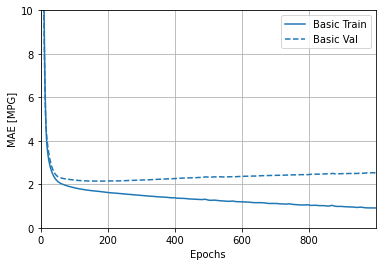

In [27]:
plotter.plot({'Basic' : history} , metric = "mae")
plt.ylim([0,10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG]')

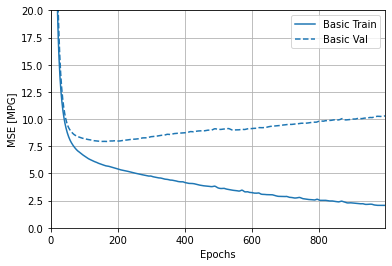

In [28]:
plotter.plot({'Basic' : history}, metric ="mse")
plt.ylim([0,20])
plt.ylabel('MSE [MPG]')

In [29]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience =10)

early_history = model.fit(normed_train_data , train_labels ,
                          epochs=EPOCHS ,validation_split = 0.2 , verbose =0 ,
                          callbacks=[early_stop ,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:581.1951,  mae:22.8254,  mse:581.7258,  val_loss:579.9779,  val_mae:22.7793,  val_mse:580.2654,  
....................................................................................................
Epoch: 100, loss:6.5864,  mae:1.8507,  mse:6.6341,  val_loss:8.8368,  val_mae:2.2508,  val_mse:8.8344,  
....................................................................

Text(0, 0.5, 'MAE [MPG]')

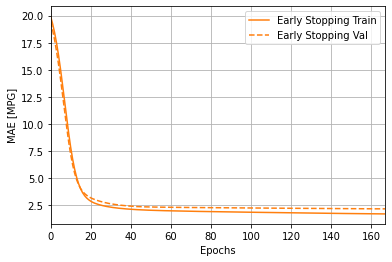

In [30]:
plotter.plot({'Early Stopping': early_history} , metric ="mae")
#plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

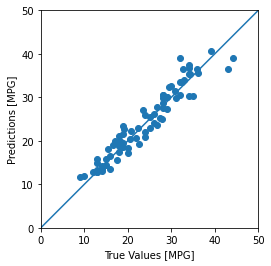

In [31]:
test_predictions = model.predict(normed_test_data).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
